# Content
    1.Import libraries
    2.Load the dataset
    3.Exploratory data analysis
        3.1.Check for missing values 
        3.2.Check for outliers
        3.3.Visualizations
    6.Data preparation
        6.1.Handling missing values
        6.2.Feature scaling
        6.3.One-hot encoding
    7.AdaBoost regression

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset

In [2]:
df = pd.read_csv('cwurData.csv')
df.shape

(2200, 14)

In [3]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [5]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [6]:
df.describe(include = 'object')

,institution,country
count,2200,2200
unique,1024,59
top,Imperial College London,USA
freq,4,573


# Exploratory data analysis

### Check for missing values

In [7]:
df.isnull().sum(axis = 0)

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

We have missing values in 'broad_impact' feature

### Check for outliers

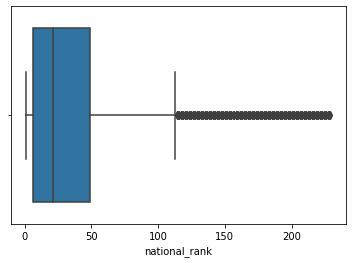

In [8]:
sns.boxplot(x = df['national_rank'])

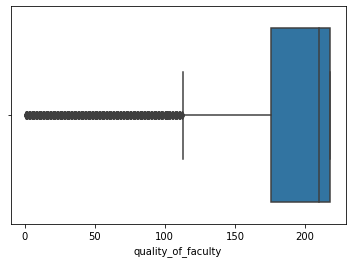

In [9]:
sns.boxplot(x = df['quality_of_faculty'])

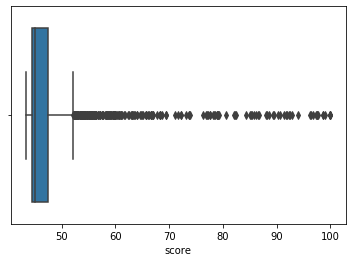

In [10]:
sns.boxplot(x = df['score'])

From these boxplots we have some outliers

### Visualizations

Text(0.5, 1.0, 'Countries with top 10 university world ranks')

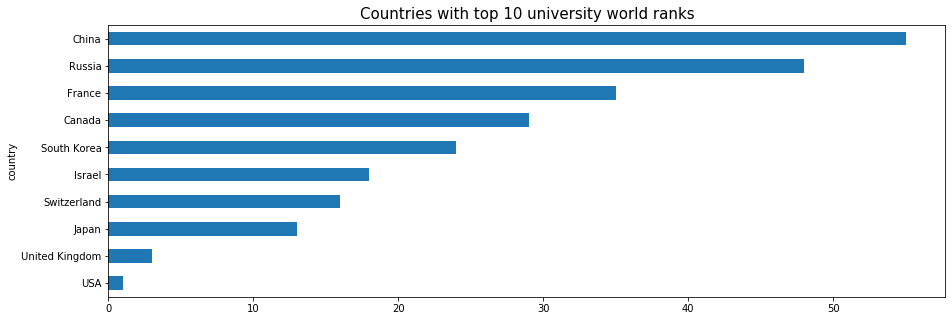

In [11]:
df.groupby(['country'])['world_rank'].min().sort_values().head(10).plot.barh(figsize = (15, 5))
plt.title('Countries with top 10 university world ranks', fontsize = 15)

Top universities are in USA, United Kingdom, Japan

Text(0.5, 1.0, 'Countries with top 10 mean university world ranks')

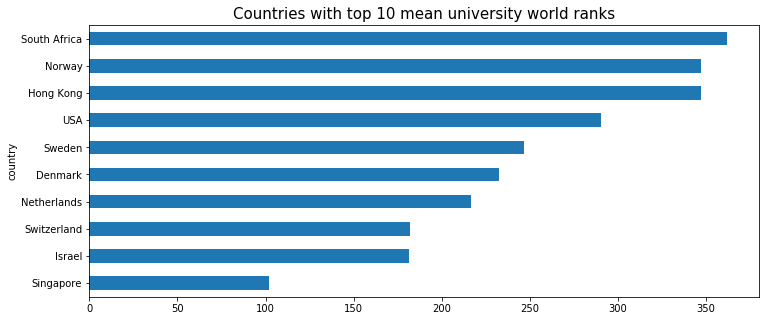

In [12]:
df.groupby(['country'])['world_rank'].mean().sort_values().head(10).plot.barh(figsize = (12, 5))
plt.title('Countries with top 10 mean university world ranks', fontsize = 15)

Countries with top mean world ranks are Singapore, Israel, Switzerland

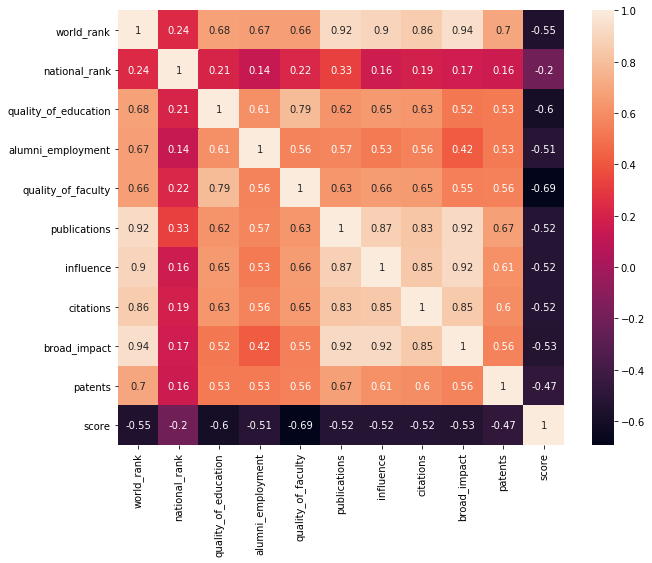

In [13]:
plt.figure(figsize = (10, 8))
correlation_map = df.drop(['year'], axis = 1).corr()
sns.heatmap(correlation_map, annot = True)

'world_rank' is highly correlated with 'broad_impact', 'publications', 'influence' and 'citations'

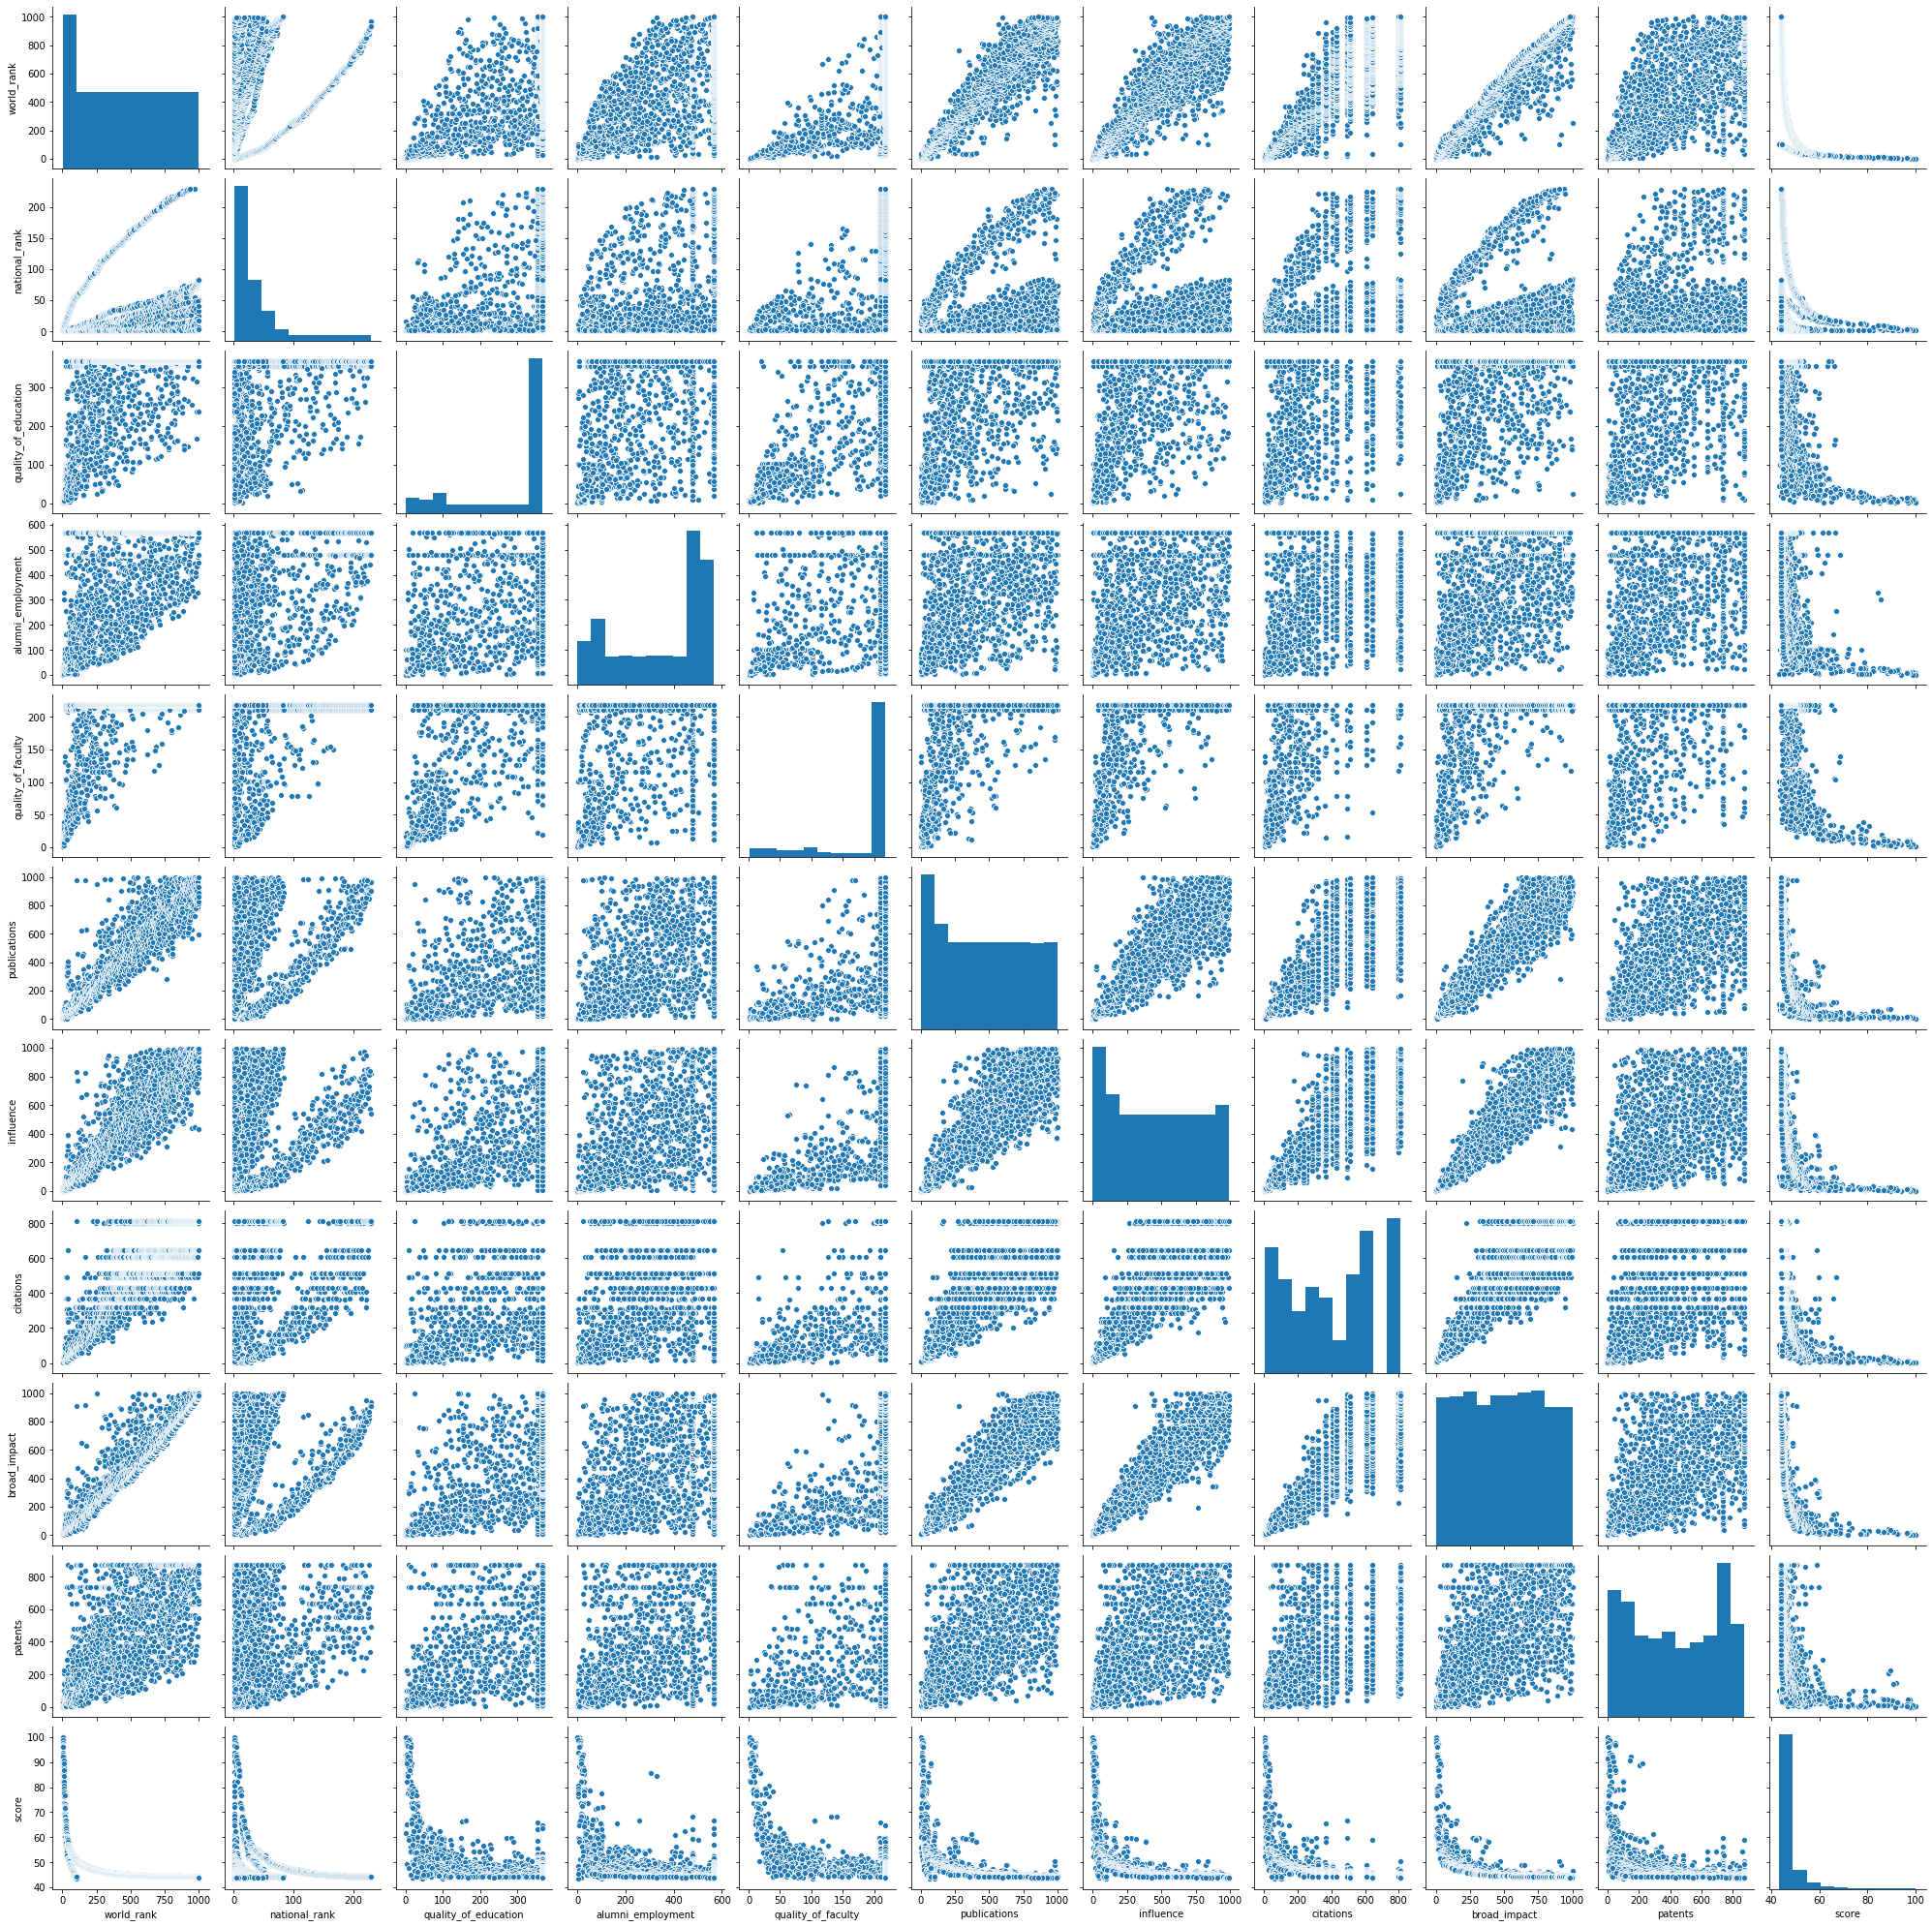

In [14]:
sns.pairplot(df.drop(['year'], axis = 1))

# Data preparation

In [15]:
df.drop(['institution'], axis = 1, inplace = True)
df.drop(['year'], axis = 1, inplace = True)

### Handling missing values

In [16]:
imputer = KNNImputer(n_neighbors = 30)

In [17]:
df_filled = imputer.fit_transform(df.drop(['country'], axis = 1))
df.drop(['broad_impact'], axis = 1, inplace = True)
df['broad_impact'] = df_filled[:, 8]
df.head()

,world_rank,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,broad_impact
0,1,USA,1,7,9,1,1,1,1,5,100.00,13.766667
1,2,USA,2,9,17,3,12,4,4,1,91.67,13.766667
2,3,USA,3,17,11,5,4,2,2,15,89.50,13.766667
3,4,United Kingdom,1,10,24,4,16,16,11,50,86.17,17.266667
4,5,USA,4,2,29,7,37,22,22,18,85.21,17.266667


### Feature scaling

In [18]:
standard_scaler = StandardScaler()

In [19]:
df_scaled = standard_scaler.fit_transform(df.drop(['world_rank', 'country'], axis = 1)) 
df.loc[:, 2:] = df_scaled
df.head()

,world_rank,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,broad_impact
0,1,USA,-0.759305,-2.199214,-1.864211,-2.777926,-1.511102,-1.512871,-1.560375,-1.563683,6.727841,-1.463954
1,2,USA,-0.739974,-2.182808,-1.821370,-2.746694,-1.474881,-1.502979,-1.549025,-1.578285,5.654255,-1.463954
2,3,USA,-0.720642,-2.117185,-1.853501,-2.715462,-1.501224,-1.509574,-1.556592,-1.527178,5.374581,-1.463954
3,4,United Kingdom,-0.759305,-2.174605,-1.783884,-2.731078,-1.461710,-1.463409,-1.522540,-1.399410,4.945405,-1.452371
4,5,USA,-0.701311,-2.240229,-1.757109,-2.684229,-1.392561,-1.443625,-1.480922,-1.516227,4.821678,-1.452371


### One-hot encoding

In [20]:
one_hot_encoder = OneHotEncoder()

In [21]:
df_one_hot = one_hot_encoder.fit_transform(df.country.values.reshape(-1, 1)).toarray()
df_encoded = pd.DataFrame(df_one_hot)
df.drop(['country'], axis = 1, inplace = True)
df = pd.concat([df, df_encoded], axis = 1)
pd.set_option('display.max_columns', None)
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,broad_impact,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1,-0.759305,-2.199214,-1.864211,-2.777926,-1.511102,-1.512871,-1.560375,-1.563683,6.727841,-1.463954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,-0.739974,-2.182808,-1.821370,-2.746694,-1.474881,-1.502979,-1.549025,-1.578285,5.654255,-1.463954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,-0.720642,-2.117185,-1.853501,-2.715462,-1.501224,-1.509574,-1.556592,-1.527178,5.374581,-1.463954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,-0.759305,-2.174605,-1.783884,-2.731078,-1.461710,-1.463409,-1.522540,-1.399410,4.945405,-1.452371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,-0.701311,-2.240229,-1.757109,-2.684229,-1.392561,-1.443625,-1.480922,-1.516227,4.821678,-1.452371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# AdaBoost regression

In [22]:
def print_scores(pred, test, shape):
    mse = mean_squared_error(y_pred = pred, y_true = test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_pred = pred, y_true = test)
    R2 = r2_score(y_pred = pred, y_true = test)
    Adj_r2 = 1 - (1 - R2) * (shape[0] - 1) / (shape[0] - shape[1] - 1)
    
    print('rmse: ', rmse)
    print('mae: ', mae)
    print('R2: ', R2)
    print('R2_adjusted: ', Adj_r2)

In [23]:
X = df.drop('world_rank', axis = True)
y = df['world_rank']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 10)

In [25]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [26]:
y_pred_train = model.predict(X_train)
print_scores(y_pred_train, y_train, X_train.shape)

rmse:  46.044197845434375
mae:  39.489759623042914
R2:  0.9768603953777393
R2_adjusted:  0.9757742506709801


In [27]:
y_pred_test = model.predict(X_test)
print_scores(y_pred_test, y_test, X_test.shape)

rmse:  48.61766974788774
mae:  42.10991686878429
R2:  0.9749821395950758
R2_adjusted:  0.9720563220222966
